In [17]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 1. TimeGAN model
from timegan import timegan
# 2. Data loading
#from data_loading import real_data_loading, sine_data_generation
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
# from metrics.visualization_metrics import visualization
from metrics.Svisualization_metrics import visualization

In [18]:
"""
    Utility functions to be shared by the time-series preprocessing required to feed the data into the synthesizers
"""
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Method implemented here: https://github.com/jsyoon0823/TimeGAN/blob/master/data_loading.py
# Originally used in TimeGAN research
def real_data_loading(data: np.array, seq_len):
    """Load and preprocess real-world datasets.
    Args:
      - data_name: Numpy array with the values from a a Dataset
      - seq_len: sequence length

    Returns:
      - data: preprocessed data.
    """
    # Flip the data to make chronological data
    ori_data = data
    #ori_data = data[::-1]
    # Normalize the data
    scaler = MinMaxScaler().fit(ori_data)
    ori_data = scaler.transform(ori_data)

    # Preprocess the dataset
    temp_data = []
    # Cut data by sequence length
    for i in range(0, len(ori_data) - seq_len):
        _x = ori_data[i:i + seq_len]
        temp_data.append(_x)
    
    return temp_data

###########################################
    # Mix the datasets (to make it similar to i.i.d)
    idx = np.random.permutation(len(temp_data))
    data = []
    for i in range(len(temp_data)):
        data.append(temp_data[idx[i]])


In [19]:
## Data loading
data_path = 'sentimenttrends_variables.csv'
seq_len = 2
#-----
ori_data = pd.read_csv(data_path)
try:
    ori_data = ori_data.set_index('Date').sort_index()
except:
    ori_data=ori_data

#Data transformations to be applied prior to be used with the synthesizer model
ori_data = real_data_loading(ori_data.values, seq_len=seq_len)
print(data_path + ' dataset is ready.')

ori_data
#print(len(ori_data),ori_data[0].shape)

sentimenttrends_variables.csv dataset is ready.


[array([[0.23457071, 0.18040897, 0.11764706],
        [0.23457071, 0.18040897, 0.11764706]]),
 array([[0.23457071, 0.18040897, 0.11764706],
        [0.23457071, 0.18040897, 0.11764706]]),
 array([[0.23457071, 0.18040897, 0.11764706],
        [0.23457071, 0.18040897, 0.11764706]]),
 array([[0.23457071, 0.18040897, 0.11764706],
        [0.23457071, 0.18040897, 0.11764706]]),
 array([[0.23457071, 0.18040897, 0.11764706],
        [0.34388522, 0.15138522, 0.11764706]]),
 array([[0.34388522, 0.15138522, 0.11764706],
        [0.34388522, 0.15138522, 0.11764706]]),
 array([[0.34388522, 0.15138522, 0.11764706],
        [0.34388522, 0.15138522, 0.11764706]]),
 array([[0.34388522, 0.15138522, 0.11764706],
        [0.34388522, 0.15138522, 0.11764706]]),
 array([[0.34388522, 0.15138522, 0.11764706],
        [0.34388522, 0.15138522, 0.11764706]]),
 array([[0.34388522, 0.15138522, 0.11764706],
        [0.25233432, 0.44162269, 0.19117647]]),
 array([[0.25233432, 0.44162269, 0.19117647],
        [0.252

In [35]:
## Newtork parameters
parameters = dict()

parameters['module'] = 'gru' 
parameters['hidden_dim'] = 32
parameters['num_layer'] = 4
parameters['iterations'] = 10000
parameters['batch_size'] = 128

In [36]:
# Run TimeGAN
generated_data = timegan(ori_data, parameters)   
print('Finish Synthetic Data Generation')

Start Embedding Network Training
step: 0/10000, e_loss: 0.1992
step: 1000/10000, e_loss: 0.1105
step: 2000/10000, e_loss: 0.0623
step: 3000/10000, e_loss: 0.0579
step: 4000/10000, e_loss: 0.048
step: 5000/10000, e_loss: 0.0467
step: 6000/10000, e_loss: 0.0423
step: 7000/10000, e_loss: 0.0321
step: 8000/10000, e_loss: 0.0244
step: 9000/10000, e_loss: 0.0278
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/10000, s_loss: 0.2689
step: 1000/10000, s_loss: 0.154
step: 2000/10000, s_loss: 0.1586
step: 3000/10000, s_loss: 0.1768
step: 4000/10000, s_loss: 0.1502
step: 5000/10000, s_loss: 0.1627
step: 6000/10000, s_loss: 0.1505
step: 7000/10000, s_loss: 0.1589
step: 8000/10000, s_loss: 0.1593
step: 9000/10000, s_loss: 0.1584
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/10000, d_loss: 2.0821, g_loss_u: 0.6902, g_loss_s: 0.124, g_loss_v: 0.2413, e_loss_t0: 0.056
step: 1000/10000, d_loss: 0.8289, g_loss_u: 2.5846, g_loss_s: 0.1559, g_loss

In [37]:
metric_iteration = 10

discriminative_score = list()
for _ in range(metric_iteration):
  temp_disc = discriminative_score_metrics(ori_data, generated_data)
  discriminative_score.append(temp_disc)

print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))
discriminative_score

Discriminative score: 0.0312


[0.015432098765432056,
 0.03395061728395066,
 0.06172839506172845,
 0.058641975308642014,
 0.043209876543209846,
 0.012345679012345734,
 0.024691358024691357,
 0.024691358024691357,
 0.03395061728395066,
 0.0030864197530864335]

In [38]:
predictive_score = list()
for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(ori_data, generated_data)
  predictive_score.append(temp_pred)   
    
print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))
predictive_score

Predictive score: 0.1598


[0.15950026585302804,
 0.16044204216917662,
 0.16055574640225326,
 0.1586723259940609,
 0.15997567539266014,
 0.16083411843241166,
 0.16007608114385846,
 0.1590621531018337,
 0.15997459201659087,
 0.1593994023535001]

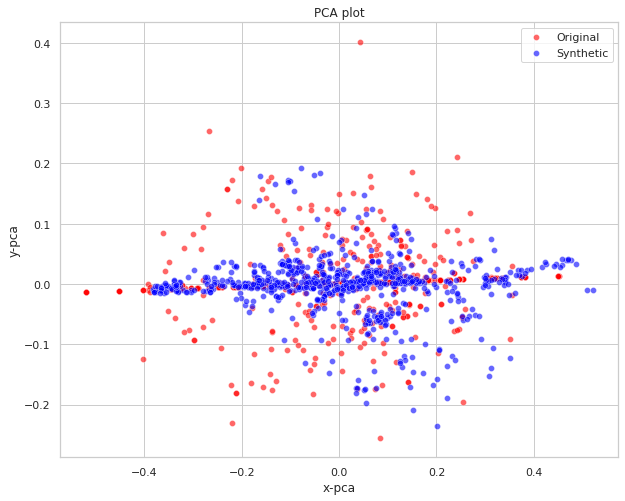

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1618 samples in 0.001s...
[t-SNE] Computed neighbors for 1618 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1618
[t-SNE] Computed conditional probabilities for sample 1618 / 1618
[t-SNE] Mean sigma: 0.009834
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.289368
[t-SNE] KL divergence after 300 iterations: 0.750727


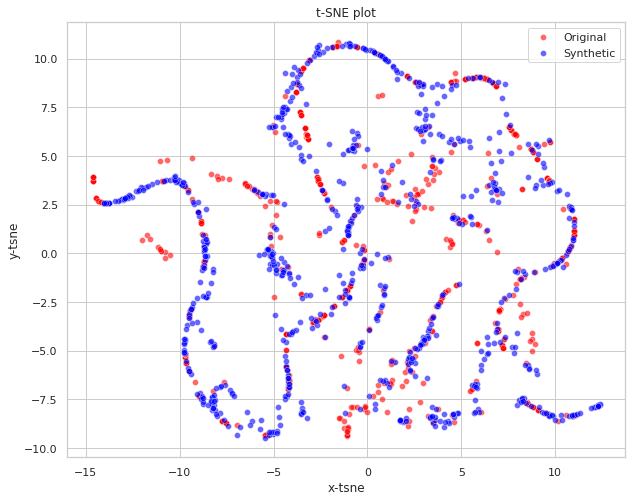

In [39]:
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')

In [41]:
generated_data

array([[[0.45281672, 0.20520064, 0.38061488],
        [0.3392024 , 0.39222497, 0.38865924]],

       [[0.47534436, 0.28726476, 0.13888988],
        [0.43340445, 0.24192554, 0.14025033]],

       [[0.69195259, 0.66965729, 0.77379572],
        [0.61192763, 0.74604338, 0.75779426]],

       ...,

       [[0.30956429, 0.43461719, 0.49413463],
        [0.83005345, 0.5459941 , 0.57396823]],

       [[0.34826511, 0.53740829, 0.56865013],
        [0.54729772, 0.32695034, 0.47653303]],

       [[0.51597703, 0.29905659, 0.32166013],
        [0.49307668, 0.13430297, 0.02595526]]])

In [42]:
generated_data_hat = np.concatenate(generated_data, axis=0)
np.asarray(generated_data_hat).shape

(1618, 3)

In [43]:
generated_data_hat

array([[0.45281672, 0.20520064, 0.38061488],
       [0.3392024 , 0.39222497, 0.38865924],
       [0.47534436, 0.28726476, 0.13888988],
       ...,
       [0.54729772, 0.32695034, 0.47653303],
       [0.51597703, 0.29905659, 0.32166013],
       [0.49307668, 0.13430297, 0.02595526]])

### Simulation

In [44]:
temp_data = []

for i in range(0, seq_len-1):
    temp_data.append(generated_data_hat[i])
for j in range(seq_len-1, len(generated_data_hat), seq_len):
    temp_data.append(generated_data_hat[j])

temp_data.append(generated_data_hat[-1])

# temp_data = temp_data[::-1]

In [45]:
temp_data
np.asarray(temp_data).shape

(811, 3)

In [46]:
temp_data

[array([0.45281672, 0.20520064, 0.38061488]),
 array([0.3392024 , 0.39222497, 0.38865924]),
 array([0.43340445, 0.24192554, 0.14025033]),
 array([0.61192763, 0.74604338, 0.75779426]),
 array([0.11148378, 0.12879449, 0.12568417]),
 array([0.69772816, 0.41728812, 0.31068808]),
 array([0.32735631, 0.41163641, 0.50233489]),
 array([0.72674239, 0.33321849, 0.42022571]),
 array([0.40935975, 0.39454654, 0.23841876]),
 array([0.45513362, 0.56147647, 0.42114553]),
 array([0.35564148, 0.42164016, 0.24771866]),
 array([0.28439349, 0.18719205, 0.11973804]),
 array([0.67604971, 0.72349167, 0.50996703]),
 array([0.335581  , 0.40153801, 0.47030905]),
 array([0.37928534, 0.47848064, 0.38203636]),
 array([0.60468137, 0.69535363, 0.80590016]),
 array([0.4547967 , 0.37132737, 0.51214373]),
 array([0.52550828, 0.19898376, 0.17579386]),
 array([0.33809677, 0.40132463, 0.49013874]),
 array([0.54781967, 0.27168167, 0.34897268]),
 array([0.24292853, 0.67855233, 0.5453015 ]),
 array([0.44864225, 0.64098406, 0.

In [47]:
# save predict file
yhat_save = pd.DataFrame(temp_data, columns=['pos_s', 'neg_s', 'trends_s'])
yhat_save.to_csv("st_s.csv", index=None)

In [49]:
raw = pd.read_csv('sentimenttrends_variables.csv',index_col=0)
inverse = pd.read_csv('st_s.csv')

scaler = MinMaxScaler().fit(raw)
inverse_data = scaler.inverse_transform(inverse)
inverse_data = pd.DataFrame(inverse_data,columns=['pos_s', 'neg_s', 'trends_s'])
inverse_data

,pos_s,neg_s,trends_s
0,1.988318,0.622168,57.881812
1,1.489438,1.189226,58.428828
2,1.903079,0.733518,41.537022
3,2.686974,2.262004,83.530010
4,0.489525,0.390505,40.546524
...,...,...,...
806,2.129075,0.517149,40.738708
807,3.644765,1.655454,71.029840
808,2.403184,0.991313,64.404246
809,2.165100,0.407207,33.764958


In [50]:
inverse_data.to_csv('st_s.csv', index=None)